In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\piyush30\Downloads\archive (4)\Mall_Customers.csv")

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
print("The shape of the given data set is:",df.shape)

The shape of the given data set is: (200, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
print("Datatypes of the coloumns:\n")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print()

Datatypes of the coloumns:

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64



In [7]:
df.describe().astype(int)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
gender_mapping = {'Male':0, 'Female':1}

df['Gender'] = df['Gender'].map(gender_mapping)

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


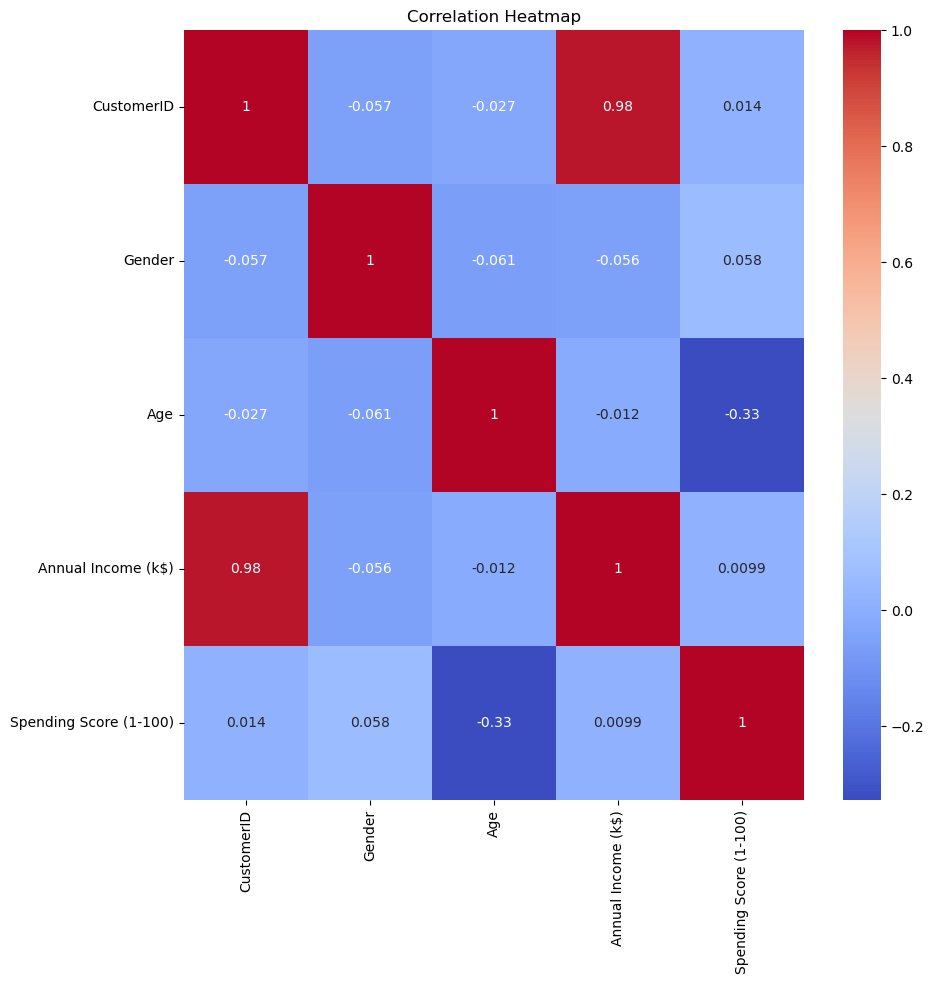

In [11]:
##Heatmap

num_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,10))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.yticks(rotation=0)
plt.show()

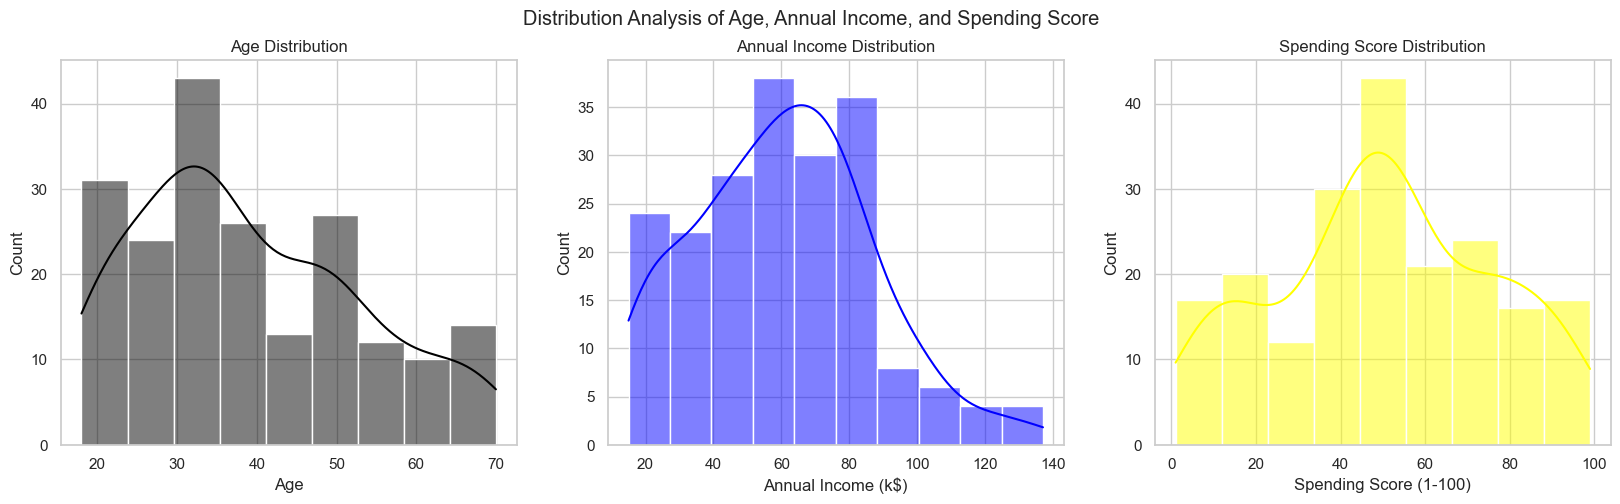

In [12]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data=df, x='Age', kde=True, color='black', ax=axs[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='blue', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='yellow', ax=axs[2])


axs[0].set_title("Age Distribution")
axs[1].set_title("Annual Income Distribution")
axs[2].set_title("Spending Score Distribution")

fig.suptitle("Distribution Analysis of Age, Annual Income, and Spending Score")

plt.show()

In [13]:
from sklearn.cluster import KMeans

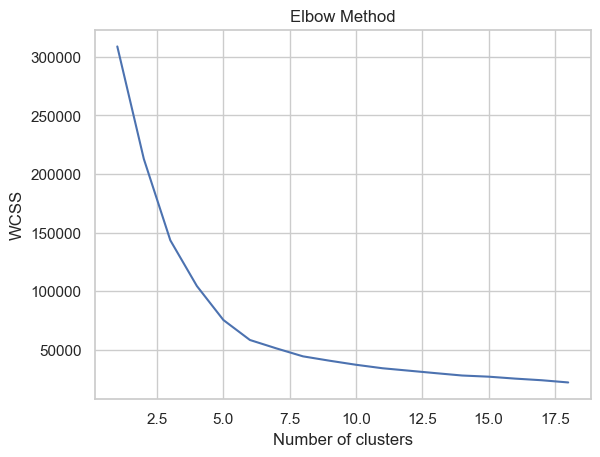

In [14]:
source = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

wcss = []

for i in range(1,19):
    
    
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10,random_state=0)
    kmeans.fit(source)
    
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range(1,19),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=12, random_state=0)

result = kmeans.fit_predict(source)

df['Cluster'] = result

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,0
1,2,0,21,15,81,3
2,3,1,20,16,6,0
3,4,1,23,16,77,3
4,5,1,31,17,40,0
5,6,1,22,17,76,3
6,7,1,35,18,6,0
7,8,1,23,18,94,3
8,9,0,64,19,3,0
9,10,1,30,19,72,3


In [16]:
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
190,191,1,34,103,23,4
191,192,1,32,103,69,1
192,193,0,33,113,8,4
193,194,1,38,113,91,1
194,195,1,47,120,16,4
195,196,1,35,120,79,1
196,197,1,45,126,28,4
197,198,0,32,126,74,1
198,199,0,32,137,18,4
199,200,0,30,137,83,1


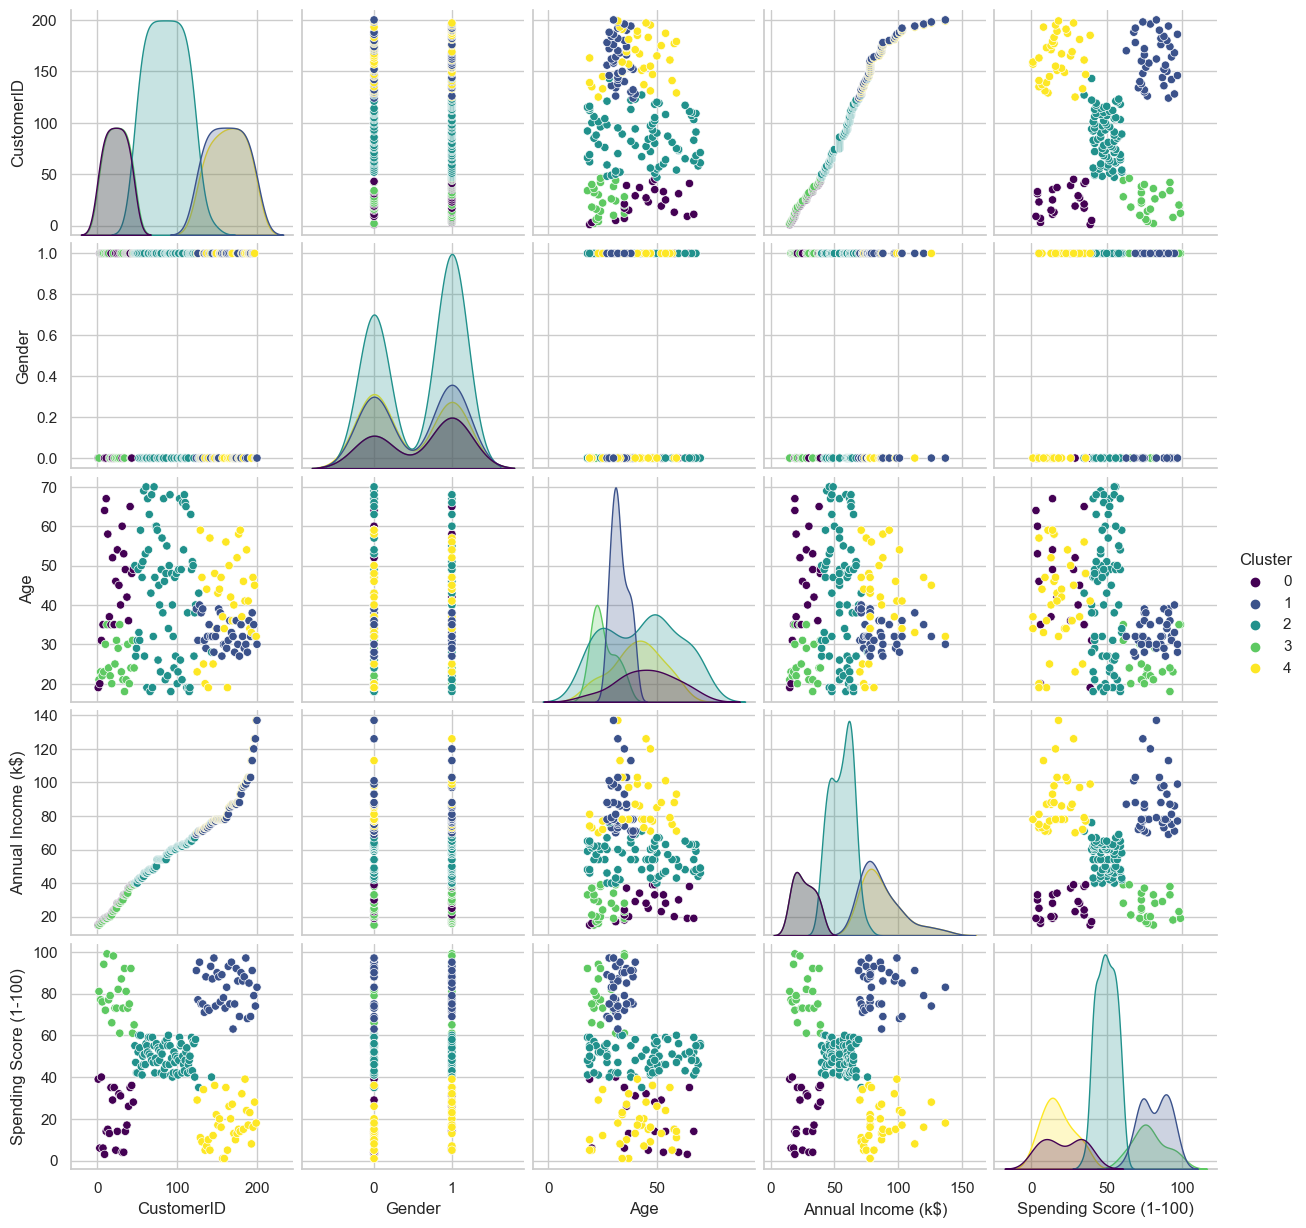

In [17]:
sns.pairplot(data=df, hue='Cluster', palette='viridis')
plt.show()

In [18]:
centers = kmeans.cluster_centers_
print(centers)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]]


In [19]:
print(centers[:,2:3])

[[20.91304348]
 [82.12820513]
 [49.56962025]
 [78.56521739]
 [17.58333333]]


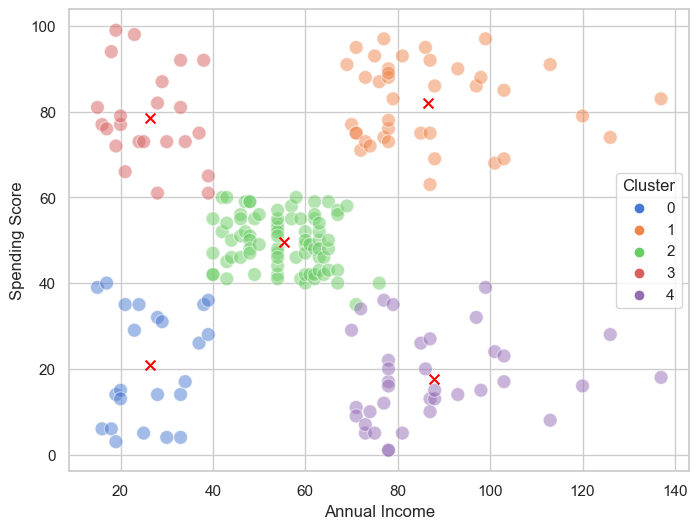

In [20]:
## let's see income vs spending 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='muted', s=100, alpha=.5)
plt.scatter(centers[:,1:2],centers[:,2:3],color='red',marker="x",s=50)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [21]:
from sklearn.metrics import silhouette_score

sls = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']], df['Cluster'])

print(f'The silhouette score is:{sls:.8f}')

The silhouette score is:0.44428598
